<a href="https://colab.research.google.com/github/saiprashanthig/Math_Techniques_in_Data_Science/blob/Homework/7026874444_Sai_Prashanthi_HW5_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Seting the random seed for reproducibility
np.random.seed(0)

# Number of examples
n = 20000

# Mean and covariance of the multivariate normal distribution
mean = [0, 0]
cov = [[1, 1.75], [1.75, 4]]

# Generate the 2-dimensional inputs
X = np.random.multivariate_normal(mean, cov, n)

epsilon=np.random.normal(0, 0.1, n)

Y = 2 * X[:, 0] + epsilon

print(X.shape)
print(Y.shape)

(20000, 2)
(20000,)


[0.00996051 0.00996269 0.01011564 0.02590914 0.10989321]


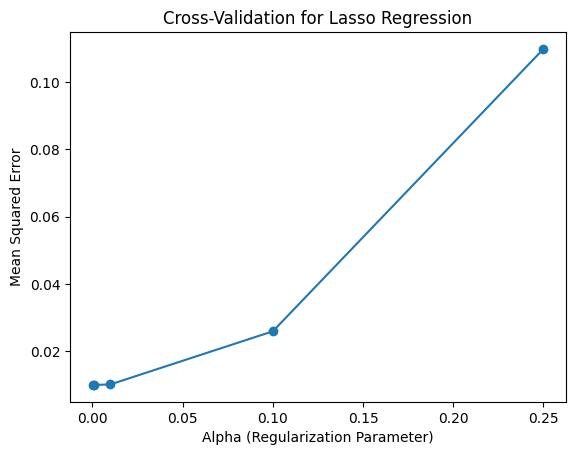

0.0001
Optimal Model Values
Alpha:0.0001
Mean Squared Error: 0.00996050674731718
Coefficients: [2.00007764e+00 1.90198160e-04]
Intercept: 6.552397837827559e-05


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Setting up a Lasso regression model with regularization parameter λ
model = Lasso()

# KFold to shuffle and split the dataset into 5 smaller datasets
kf = KFold(n_splits=5, shuffle=True, random_state=5)

# 5-fold cross-validation to choose an optimal value of λ
K=5 #K-fold

alphas = np.array([0.0001,0.001,0.01,0.1,0.25])

N = len(alphas) # Number of Lasso parameters

scores = np.zeros((N,K))

for i in range(N):
  model = Lasso(alpha=alphas[i])
  for j, (train, test) in enumerate(kf.split(X)):
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    scores[i,j] = mean_squared_error(Y_test, Y_pred)

# Average CV score for each parameter
scores_avg = scores.mean(axis=1)
print(scores_avg)

plt.plot(alphas, scores_avg,marker='o')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation for Lasso Regression')
plt.show()

#Optimal Model with Alpha Star
min_index = np.argmin(scores_avg)

# Retrieve the corresponding alpha value
alpha_star = alphas[min_index]
print(alpha_star)

optimal_model = Lasso(alpha =alpha_star) #Performing Lasso(λ∗)
optimal_model.fit(X,Y)

print("Optimal Model Values")
print(f"Alpha:{alpha_star}")
print(f"Mean Squared Error: {scores_avg[min_index]}")
print(f"Coefficients: {optimal_model.coef_}")
print(f"Intercept: {optimal_model.intercept_}")

Conclusion : X does not meet the mutual incoherence condition because |(1.75)*(1)| > 1, which means that the lasso will fail in this case. The procedure does not recover the correct significant features for Y as it also outputs a small value for x2.

[0.00995911 0.00997758 0.01184638 0.19880326 1.19027236]


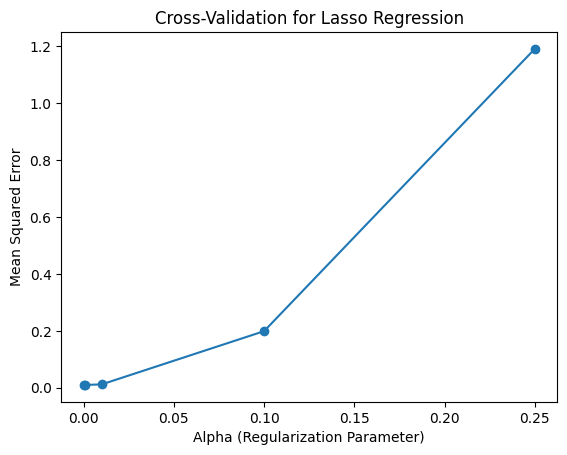

Optimal Model Values
Alpha:0.0001
Mean Squared Error: 0.009959105127591744
Coefficients: [8.7198235 0.       ]
Intercept: -0.10326637188568952


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# X standardization to [-1,1] to obtain X'
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

X_standardized = min_max_scaler.fit_transform(X)


K=5 #K-foldCV

alphas = np.array([0.0001,0.001,0.01,0.1,0.25]) # Candidates for values of hyper-parameter

N = len(alphas) # Number of lasso parameters
scores = np.zeros((N,K))
kf = KFold(n_splits=K,shuffle=True,random_state=21)


for i in range(N):
   model_lasso = Lasso(alpha =alphas[i])
   for j, (train, test) in enumerate(kf.split(X_standardized)):
      X_standardized_train, X_standardized_test, Y_train, Y_test = X_standardized[train], X_standardized[test], Y[train], Y[test]
      model_lasso.fit(X_standardized_train,Y_train)
      Y_pred = model_lasso.predict(X_standardized_test)
      scores[i,j] = mean_squared_error(Y_test, Y_pred)

# Compute average CV score for each parameter
scores_avg = scores.mean(axis=1)

print(f"{scores_avg}")


# Plotting
plt.plot(alphas, scores_avg,marker='o')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation for Lasso Regression')
plt.show()

#Optimal Model with Alpha Star
min_index = np.argmin(scores_avg)

# Retrieve the corresponding alpha value
alpha_star = alphas[min_index]

optimal_model = Lasso(alpha =alpha_star)
optimal_model.fit(X_standardized_train,Y_train)

print("Optimal Model Values")
print(f"Alpha:{alpha_star}")
print(f"Mean Squared Error: {scores_avg[min_index]}")
print(f"Coefficients: {optimal_model.coef_}")
print(f"Intercept: {optimal_model.intercept_}")

The procedure recovers the correct significant features for Y as it only recovers the value of x1. x2 is detected as the non significant feature here.